<a href="https://colab.research.google.com/github/YasirHabib/tensorflow/blob/master/fashion_mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import torch
from torch.autograd import Variable
from torch import optim

In [0]:
class ANN():
  def __init__(self, size):
    self.size = size
    
  def fit(self, Xtrain, Ytrain, Xtest, Ytest, training_epochs=5, batch_sz=800):
    
    N,D = Xtrain.shape
    K = len(set(Ytrain))
    
    # convert the data arrays into torch tensors
    Xtrain = torch.from_numpy(Xtrain).float()
    Ytrain = torch.from_numpy(Ytrain).long()
    Xtest = torch.from_numpy(Xtest).float()
    Ytest = torch.from_numpy(Ytest).long()
    
    model = torch.nn.Sequential()
    
    model.add_module("dense1", torch.nn.Linear(D,self.size))
    model.add_module("relu1", torch.nn.ReLU())
    model.add_module("dense2", torch.nn.Linear(self.size,K))
    # Note: no final softmax!
    # just like Tensorflow, it's included in cross-entropy function
    
    loss = torch.nn.CrossEntropyLoss()
    
    optimizer = optim.Adam(model.parameters())
    
    def train(model, loss, optimizer, inputs, labels):
      inputs = Variable(inputs, requires_grad=False)
      labels = Variable(labels, requires_grad=False)
      
      optimizer.zero_grad()
      
      # get output from the model, given the inputs
      logits = model.forward(inputs)
      
      # get loss for the predicted output
      cost = loss.forward(logits, labels)
      
      # get gradients w.r.t to parameters
      cost.backward()
      
      # update parameters
      optimizer.step()
      
      return cost.item()
    
    def test(model, loss, inputs, labels):
      inputs = Variable(inputs, requires_grad=False)
      labels = Variable(labels, requires_grad=False)
      
      logits = model.forward(inputs)
      cost = loss.forward(logits, labels)
      
      return cost.item()
    
    def predict(model, inputs):
      inputs = Variable(inputs, requires_grad=False)
      
      logits = model.forward(inputs)
      return logits.data.numpy().argmax(axis=1)
      
    n_batches = N // batch_sz

    train_costs = []
    test_costs = []
    train_accuracies = []
    test_accuracies = []
    
    for epoch in range(training_epochs):
      for j in range(n_batches):
        Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz)]
        Ybatch = Ytrain[j*batch_sz:(j*batch_sz + batch_sz)]
        
        train_c=train(model, loss, optimizer, Xbatch, Ybatch)
        
        if j%10 == 0:
          train_costs.append(train_c)
          
          test_c=test(model, loss, Xtest, Ytest)
          test_costs.append(test_c)
          
          p_train = predict(model, Xtrain)
          p_test = predict(model, Xtest)
          
          acc_train = np.mean(p_train == Ytrain.numpy())
          train_accuracies.append(acc_train)
          
          acc_test = np.mean(p_test == Ytest.numpy())
          test_accuracies.append(acc_test)
          
          print("Epoch", (epoch+1), "Training Cost", "%.2f" % train_c, "Test cost", "%.2f" % test_c, "Training Acc", "%.2f" % acc_train, "Test Acc", "%.2f" % acc_test)
    
    plt.plot(train_costs, label='Training Cost')
    plt.plot(test_costs, label='Test Cost')
    plt.legend()
    plt.show()
    
    plt.plot(train_accuracies, label='Training accuracy')
    plt.plot(test_accuracies, label='Test accuracy')
    plt.legend()
    plt.show()

In [0]:
def main():
  from google.colab import drive
  drive.mount('/content/gdrive', force_remount=True)
  
  df_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/fashion-mnist_train.csv')
  df_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/fashion-mnist_test.csv')
  
  #print(df_train.dtypes)
  #print(df_train.columns)
  #print(df_train.info())
  #print(df_train.head())
  #print(df_train.head)
  
  data_train = df_train.values
  data_test = df_test.values
  
  Xtrain = data_train[:,1:]
  Ytrain = data_train[:,0]
  
  Xtest = data_test[:,1:]
  Ytest = data_test[:,0]
  
    # Normalization
  Xtrain = (Xtrain - Xtrain.mean(axis=0)) / Xtrain.std(axis=0)
  Xtest = (Xtest - Xtest.mean(axis=0)) / Xtest.std(axis=0)
  
  model = ANN(128)
  model.fit(Xtrain, Ytrain, Xtest, Ytest)

Mounted at /content/gdrive
Epoch 1 Training Cost 2.31 Test cost 1.95 Training Acc 0.48 Test Acc 0.47
Epoch 1 Training Cost 0.85 Test cost 0.82 Training Acc 0.72 Test Acc 0.71
Epoch 1 Training Cost 0.65 Test cost 0.64 Training Acc 0.77 Test Acc 0.76
Epoch 1 Training Cost 0.52 Test cost 0.55 Training Acc 0.80 Test Acc 0.80
Epoch 1 Training Cost 0.46 Test cost 0.51 Training Acc 0.82 Test Acc 0.82
Epoch 1 Training Cost 0.48 Test cost 0.48 Training Acc 0.83 Test Acc 0.83
Epoch 1 Training Cost 0.46 Test cost 0.46 Training Acc 0.84 Test Acc 0.83
Epoch 1 Training Cost 0.45 Test cost 0.45 Training Acc 0.84 Test Acc 0.84
Epoch 2 Training Cost 0.41 Test cost 0.44 Training Acc 0.85 Test Acc 0.85
Epoch 2 Training Cost 0.44 Test cost 0.43 Training Acc 0.85 Test Acc 0.85
Epoch 2 Training Cost 0.41 Test cost 0.42 Training Acc 0.85 Test Acc 0.85
Epoch 2 Training Cost 0.37 Test cost 0.41 Training Acc 0.86 Test Acc 0.85
Epoch 2 Training Cost 0.37 Test cost 0.41 Training Acc 0.86 Test Acc 0.86
Epoch 2 Tra

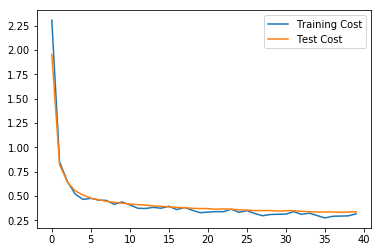

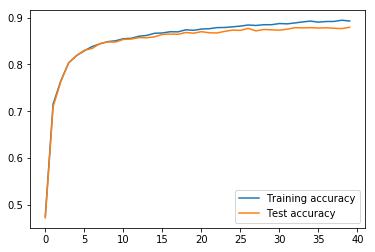

In [185]:
if __name__ == '__main__':
  main()